<a href="https://colab.research.google.com/github/Rohitdwivedi16111998/Pneumonia-Classification-/blob/master/Model_Evaluation_on_Testing_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [43]:
import keras
from keras.models import load_model
import os
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt


**IMPORTING MODEL**

In [2]:
model = load_model('/content/drive/My Drive/Pneumonia/MODEL.h5')

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rsdwivedi","key":"26c02958520a7ff0624b928d1fc36058"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json 

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:19<00:00, 111MB/s]
100% 2.29G/2.29G [00:19<00:00, 126MB/s]


In [6]:
from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**IMPORTING TESTING IMAGES AND LABELS**

In [7]:
X_test = []
y_test = []

In [8]:
os.chdir('/content/chest_xray/test/NORMAL')

In [9]:
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))   
      X_test.append(img)
      y_test.append("0") 
#234 normal X-ray images in testing

In [10]:
os.chdir('/content/chest_xray/test/PNEUMONIA')

In [11]:
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))   
      X_test.append(img)
      y_test.append("1") 
 #390 normal X-ray images in testing 

In [12]:
 #converting testing images and labels to array
X_test = np.array(X_test)  
y_test = np.array(y_test)  

In [13]:
predicted_classes = model.predict(X_test[:,:,:,:])      #stored prediction made by model for testing images in predicted_classes
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes[0]

1

In [14]:
y_test = y_test.astype('int64')   #changed the data type of testing labels 

In [15]:
y_test.dtype

dtype('int64')

**MODEL PERFORMANCE ON TESTING IMAGES**

In [40]:
from sklearn.metrics import accuracy_score,classification_report

In [41]:
accuracy_score(predicted_classes,y_test)    #accuracy score of model on testing images

0.782051282051282

In [42]:
print(classification_report(predicted_classes,y_test))  #classification report of model on testing images

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       244
           1       0.81      0.83      0.82       380

    accuracy                           0.78       624
   macro avg       0.77      0.77      0.77       624
weighted avg       0.78      0.78      0.78       624



**MODEL PREDICTION ON TESTING IMAGES**



		0 Class Represents Normal & 1 Class Represents Pnemonia


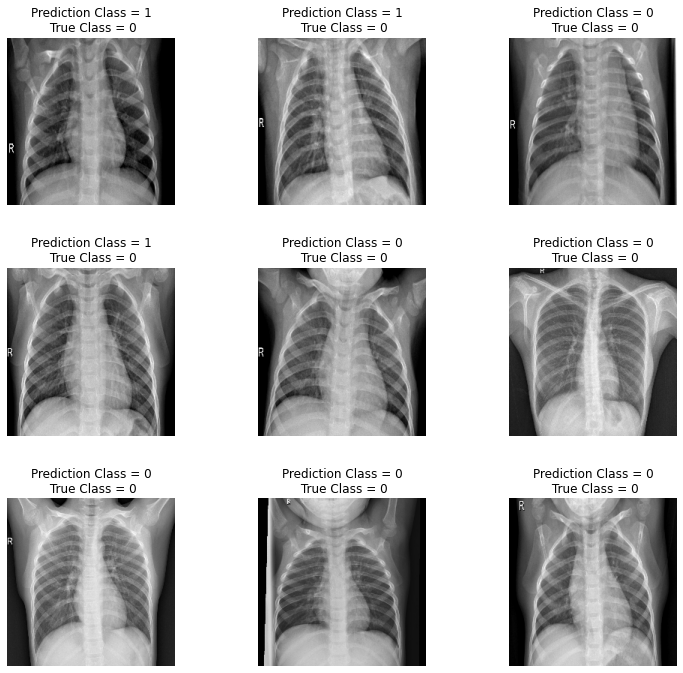

In [44]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
print('\n\n\t\t0 Class Represents Normal & 1 Class Represents Pnemonia')
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

Out of 6 X-Rays, 5 were correctly classified by the model whereas 1 was misclassified